In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate balance column

define a 1000 value array of bank balance.
It should have some accounts with overdraft, some with high balance and some with small balance

In [3]:
# initial balance array
balance_mu = 0.5
balance_sigma = 0.2
balance = np.random.normal(balance_mu, balance_sigma, [1,1000])
balance = balance - 0.1
balance = balance * 10000

income_mu = 10000
income_sigma = 6000
income = np.random.normal(income_mu, income_sigma, [1,1000])

monthly_loan_mu = 5000
monthly_load_sigma = 1000
monthly_loan = np.random.normal(monthly_loan_mu, monthly_load_sigma, [1,1000])

default = np.zeros([1,1000])
default[income_mu < 0] = 1
default[balance < 0] = 1
default[monthly_loan > income] = 1

default = np.round(default.squeeze())
balance = np.round(balance.squeeze())
income = np.round(income.squeeze())
monthly_loan = np.round(monthly_loan.squeeze())
print(default.shape)
print(balance.shape)
print(income.shape)
print(monthly_loan.shape)


(1000,)
(1000,)
(1000,)
(1000,)


# Visualize

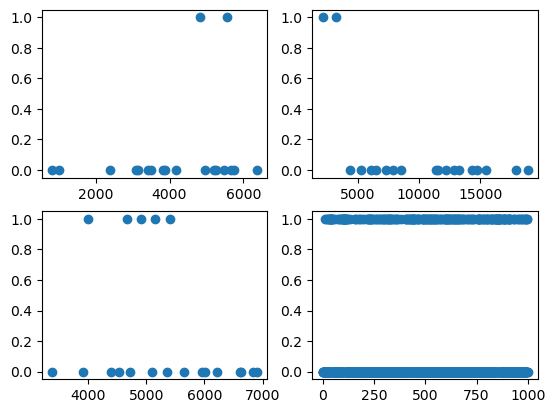

In [4]:
indexer = np.arange(0,1000).squeeze()
fig, ax = plt.subplots(nrows = 2, ncols = 2)
ax[0][0].scatter(balance[1:20], default[1:20])
ax[0][1].scatter(income[1:20], default[1:20])
ax[1][0].scatter(monthly_loan[980:1000], default[980:1000])
ax[1][1].scatter(indexer, default)
plt.show()

# Create dataframe


In [5]:
df = pd.DataFrame(data={"Balance": balance,
                        "Income": income,
                        "Loan": monthly_loan,
                        "Default": default})
df.head()

,Balance,Income,Loan,Default
0,4439.0,21074.0,5828.0,0.0
1,4184.0,6438.0,4364.0,0.0
2,3079.0,14347.0,4886.0,0.0
3,5263.0,7249.0,5514.0,0.0
4,5656.0,4340.0,4172.0,0.0


In [6]:
df.to_csv("loan_default.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


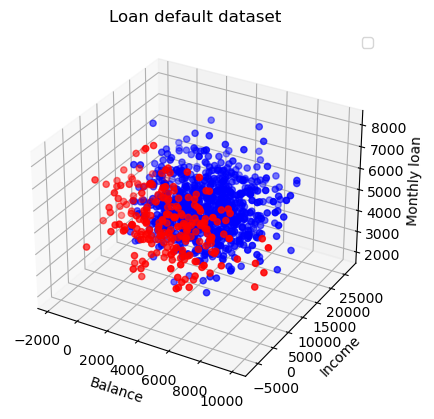

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

balance_d = balance[default == 1]
income_d = income[default == 1]
monthly_loan_d = monthly_loan[default == 1]

balance_nd = balance[default == 0]
income_nd = income[default == 0]
monthly_loan_nd = monthly_loan[default == 0]

ax.scatter(balance_d, income_d, monthly_loan_d, c='r')
ax.set_xlabel('Balance')
ax.set_ylabel('Income')
ax.set_zlabel('Monthly loan')
ax.set_title("Loan default dataset")
ax.scatter(balance_nd, income_nd, monthly_loan_nd, c='b')

#plt.scatter(balance, income, monthly_loan)
plt.show()